In [ ]:
#Importing Necessary Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score
)

In [ ]:
#Importing the MNIST Dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
print("Shape of y_train : ", y_train.shape)
print("Shape of y_test : ", y_test.shape)


11490434/11490434 [==============================] - 0s 0us/step
Shape of X_train :  (60000, 28, 28)
Shape of X_test :  (10000, 28, 28)
Shape of y_train :  (60000,)
Shape of y_test :  (10000,)


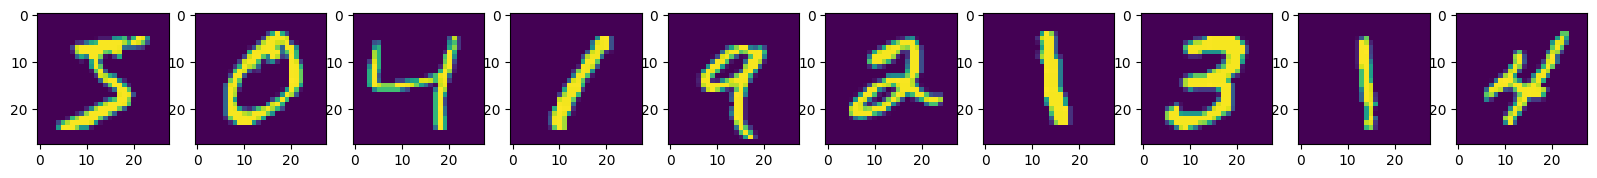

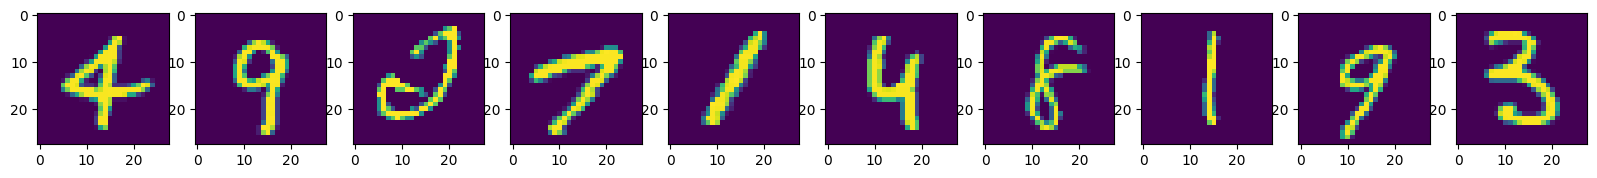

In [ ]:
#Loading Sample Images
plt.figure(figsize=(20,20))
plt.subplot(1,10,1)
plt.imshow(X_train[0])
plt.subplot(1,10,2)
plt.imshow(X_train[1])
plt.subplot(1,10,3)
plt.imshow(X_train[2])
plt.subplot(1,10,4)
plt.imshow(X_train[3])
plt.subplot(1,10,5)
plt.imshow(X_train[4])
plt.subplot(1,10,6)
plt.imshow(X_train[5])
plt.subplot(1,10,7)
plt.imshow(X_train[6])
plt.subplot(1,10,8)
plt.imshow(X_train[7])
plt.subplot(1,10,9)
plt.imshow(X_train[8])
plt.subplot(1,10,10)
plt.imshow(X_train[9])
plt.figure(figsize=(20,20))
plt.subplot(1,10,1)
plt.imshow(X_train[150])
plt.subplot(1,10,2)
plt.imshow(X_train[162])
plt.subplot(1,10,3)
plt.imshow(X_train[178])
plt.subplot(1,10,4)
plt.imshow(X_train[193])
plt.subplot(1,10,5)
plt.imshow(X_train[205])
plt.subplot(1,10,6)
plt.imshow(X_train[3978])
plt.subplot(1,10,7)
plt.imshow(X_train[456])
plt.subplot(1,10,8)
plt.imshow(X_train[7896])
plt.subplot(1,10,9)
plt.imshow(X_train[57])
plt.subplot(1,10,10)
plt.imshow(X_train[31897])

In [ ]:
#Data Preprocessing
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
input_shape = (28,28,1)
print("Shape of X_train : ", X_train.shape)
print("Shape of X_test : ", X_test.shape)

Shape of X_train :  (60000, 28, 28)
Shape of X_test :  (10000, 28, 28)
Shape of X_train :  (60000, 28, 28, 1)
Shape of X_test :  (10000, 28, 28, 1)


In [ ]:
#One-Hot Encoding
y_cat_train = to_categorical(y_train, 10)
y_cat_test = to_categorical(y_test, 10)
y_cat_train[0:11]
#Scaling feature data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
#Model Creation
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 64)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 256)               2359552   
                                                        

In [ ]:
#Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=2)
#Model Training
model.fit(X_train, y_cat_train, epochs=2, callbacks = [early_stop], validation_data=(X_test,
y_cat_test))
print("The model has successfully trained")
model.save('mnist.h5')
print("Saving the model as mnist.h5")

Epoch 1/2
1875/1875 [==============================] - 179s 95ms/step - loss: 0.0469 - accuracy: 0.9851 - val_loss: 0.0376 - val_accuracy: 0.9871
Epoch 2/2
1875/1875 [==============================] - 177s 94ms/step - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0304 - val_accuracy: 0.9896
The model has successfully trained
Saving the model as mnist.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Test loss: 0.030429067090153694
Test accuracy: 0.9896000027656555


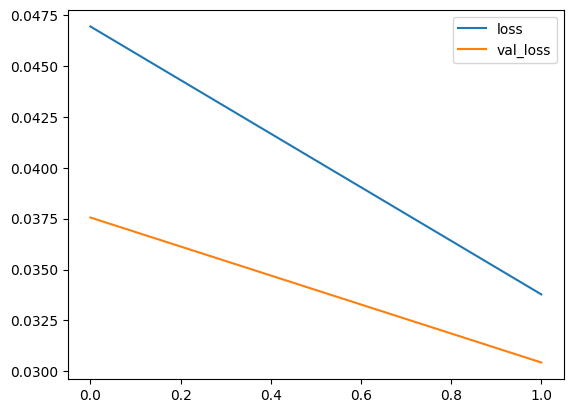

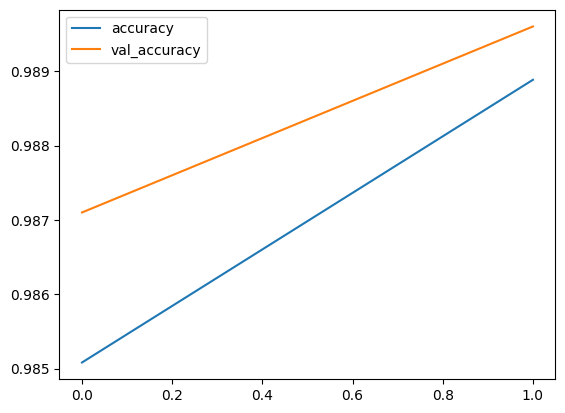

In [ ]:
#Model Performance
training_metrics = pd.DataFrame(model.history.history)
training_metrics.head()
training_metrics[['loss','val_loss']].plot()
training_metrics[['accuracy','val_accuracy']].plot()
score = model.evaluate(X_test, y_cat_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

In [ ]:
#Model Predictions
predictions = np.argmax(model.predict(X_test), axis=-1)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

313/313 [==============================] - 11s 32ms/step
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      0.99      1.00      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       0.98      0.99      0.99      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

[[ 976    0    1    0    0    0    1    1    1    0]
 [   0 1128    3    1    0    1    0    1    1    0]
 [   1    0 1026    0    1    0    0    4    0    0]
 [   0    0    1 1004    

1/1 [==============================] - 0s 21ms/step


5

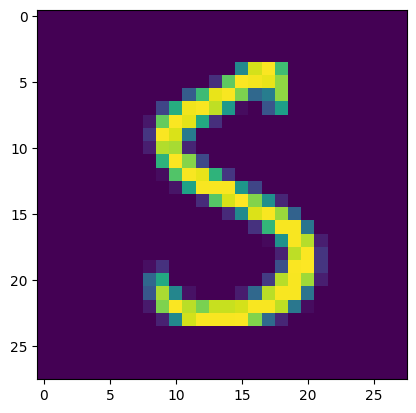

In [ ]:
#Predicting Individual Images
new_img = X_test[95]
plt.imshow(new_img)
y_test[95]
np.argmax(model.predict(new_img.reshape(1,28,28,1)), axis=-1)
new_img2 = X_test[0]
plt.imshow(new_img2)
y_test[0]
np.argmax(model.predict(new_img2.reshape(1,28,28,1)), axis=-1)
new_img3 = X_test[397]
plt.imshow(new_img3)
y_test[397]